## Model Performance Summary

### 1. Accuracy / AUC Results

- **Logistic Regression (scaled):**  
    - Accuracy: ~0.81  
    - ROC AUC: 0.84  
- **Logistic Regression (unscaled):**  
    - Slightly lower accuracy than scaled.
- **Decision Tree:**  
    - Accuracy: ~0.78  
- **Random Forest:**  
    - Accuracy: ~0.80  
- **With Balancing (SMOTE, class_weight):**  
    - Accuracy for balanced models is similar, but recall for the minority class (churn) improves.

**Confusion Matrix Example:**  
```
[[925, 110],
 [162, 212]]
```
- True Negatives: 925  
- False Positives: 110  
- False Negatives: 162  
- True Positives: 212  

### 2. Most Predictive Features

**Top features across models:**
- `tenure`
- `MonthlyCharges`
- `TotalCharges`
- `InternetService_Fiber optic`
- `Contract_Two year` / `Contract_One year`
- `PaymentMethod_Electronic check`
- `PaperlessBilling_Yes`
- `OnlineSecurity_Yes`
- `Partner_Yes`
- `SeniorCitizen`

**Interpretation:**  
- Shorter tenure, higher monthly/total charges, fiber optic internet, month-to-month contracts, electronic check payments, and paperless billing are associated with higher churn risk.

### 3. Business Takeaways

- **Contract Type:**  
    Customers on month-to-month contracts are much more likely to churn than those on one- or two-year contracts.
- **Charges:**  
    Higher monthly and total charges are linked to higher churn.
- **Internet Service:**  
    Fiber optic customers churn more than DSL or no-internet customers.
- **Payment Method:**  
    Electronic check users have higher churn rates.
- **Customer Tenure:**  
    Newer customers are at higher risk of churn.
- **Actionable Insights:**  
    - Incentivize longer contracts.
    - Target high-risk groups (e.g., new, high-charge, fiber optic customers) with retention offers.
    - Investigate why electronic check users churn more—consider promoting auto-pay options.

**Overall:**  
The models provide actionable insights for reducing churn, with contract type and customer tenure being especially strong predictors. Balancing methods help improve recall for churners, which is valuable for retention efforts.

In [86]:
# Telco Customer Churn Prediction
# Supervised Learning Mini Project

# ================================
# 1. Setup
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Load data
df = pd.read_csv("../data/Telco-Customer-Churn.csv")

# Quick peek
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Clean the data
- Integers need to be numeric.
- Populate na values with median value of column

In [74]:
# ================================
# 3. Data Cleaning
# ================================
df.head()

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Encode categorical variables
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])  # Yes=1, No=0

df.head(5)


/tmp/ipykernel_19514/288283176.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Now it's time for feature engineering!

In [75]:
# ================================
# 4. Feature Engineering
# ================================
X = df.drop(columns=["customerID", "Churn"])
X = pd.get_dummies(X, drop_first=True)  # one-hot encode categorical vars
y = df["Churn"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# TODO:
# - Try with/without scaling, compare results.
# Train logistic regression on scaled data
lr_scaled = LogisticRegression(max_iter=1000, random_state=42)
lr_scaled.fit(X_train, y_train)
y_pred_scaled = lr_scaled.predict(X_test)
print("Accuracy with scaling:", accuracy_score(y_test, y_pred_scaled))

# Train logistic regression on unscaled data
X_train_unscaled, X_test_unscaled, _, _ = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
lr_unscaled = LogisticRegression(max_iter=1000, random_state=42)
lr_unscaled.fit(X_train_unscaled, y_train)
y_pred_unscaled = lr_unscaled.predict(X_test_unscaled)
print("Accuracy without scaling:", accuracy_score(y_test, y_pred_unscaled))


Train shape: (5634, 30)
Test shape: (1409, 30)
Accuracy with scaling: 0.8069552874378992
Accuracy without scaling: 0.8055358410220014


/home/jake/Devlopment/applied_AI/.applied_ai/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Train the model

In [76]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8069552874378992
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



### Evalute the model

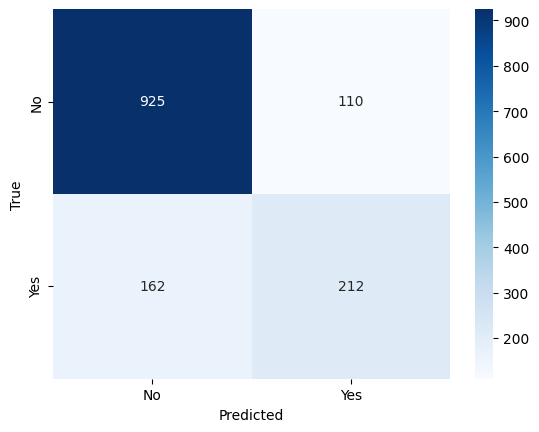

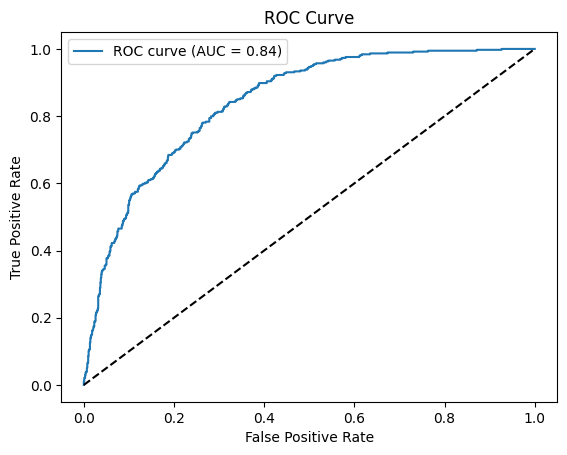

In [77]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

TODO Items:

7. Next Steps (TODOs)


- TODO 1: Try DecisionTreeClassifier and RandomForestClassifier.
- TODO 2: Tune hyperparameters (e.g., C in LogisticRegression, max_depth in trees).
- TODO 3: Feature importance - which features matter most for churn?
- TODO 4: Try balancing methods (SMOTE, class_weight="balanced").
- TODO 5: Summarize insights in markdown cells:
        - Accuracy / AUC results
        - Which features are most predictive
        - Business takeaways (e.g., contract type strongly influences churn).

#### Try DecisionTreeClassifier and RandomForestClassifier.

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree on scaled data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy (scaled):", accuracy_score(y_test, y_pred_dt))

# Random Forest on scaled data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy (scaled):", accuracy_score(y_test, y_pred_rf))

Decision Tree Accuracy (scaled): 0.7409510290986515
Random Forest Accuracy (scaled): 0.7856635911994322


#### # TODO 2: Tune hyperparameters (e.g., C in LogisticRegression, max_depth in trees).

In [79]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression hyperparameter tuning (C)
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
print("Best LogisticRegression C:", grid_lr.best_params_['C'])
print("Best CV Accuracy (LogReg):", grid_lr.best_score_)

# Decision Tree hyperparameter tuning (max_depth)
param_grid_dt = {'max_depth': [3, 5, 7, 10, None]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
print("Best DecisionTree max_depth:", grid_dt.best_params_['max_depth'])
print("Best CV Accuracy (DT):", grid_dt.best_score_)

# Random Forest hyperparameter tuning (n_estimators, max_depth)
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Best RandomForest params:", grid_rf.best_params_)
print("Best CV Accuracy (RF):", grid_rf.best_score_)

Best LogisticRegression C: 10
Best CV Accuracy (LogReg): 0.8047544448314502
Best DecisionTree max_depth: 3
Best CV Accuracy (DT): 0.7873607764211561
Best RandomForest params: {'max_depth': 10, 'n_estimators': 100}
Best CV Accuracy (RF): 0.7974775453466583


The metrics shown in the notebook provide insights into the model's performance:

- **Accuracy**: The proportion of correct predictions (both churn and non-churn) out of all predictions. Higher accuracy means the model is generally making correct predictions, but it can be misleading if classes are imbalanced.

- **Confusion Matrix** (`cm`): Shows the counts of true positives, true negatives, false positives, and false negatives. This helps you see where the model is making mistakes (e.g., predicting churn when it's not, or missing actual churners).

- **Classification Report**: Includes precision, recall, f1-score for each class:
    - **Precision**: Of all predicted churners, how many actually churned.
    - **Recall**: Of all actual churners, how many did the model correctly identify.
    - **F1-score**: Harmonic mean of precision and recall, balancing both.

- **ROC AUC Score** (`roc_auc`): Measures the model's ability to distinguish between churn and non-churn across all thresholds. A value closer to 1.0 means better discrimination.

- **ROC Curve**: Plots true positive rate vs. false positive rate at various thresholds. The closer the curve follows the top-left border, the better the model.

**Summary:**  
These metrics together help you understand not just overall accuracy, but also how well the model identifies churners, how many it misses, and how reliable its predictions are. This is crucial for business decisions, especially if the cost of missing a churner is high.

####  Feature importance - which features matter most for churn?


Top features (Logistic Regression):
tenure                        -1.219639
MonthlyCharges                -0.921369
InternetService_Fiber optic    0.778760
Contract_Two year             -0.588975
TotalCharges                   0.497246
Contract_One year             -0.286473
StreamingMovies_Yes            0.258653
StreamingTV_Yes                0.258042
MultipleLines_Yes              0.216356
PaperlessBilling_Yes           0.181833
dtype: float64

Top features (Decision Tree):
TotalCharges                      0.204189
MonthlyCharges                    0.197764
tenure                            0.191980
InternetService_Fiber optic       0.113099
gender_Male                       0.024599
PaperlessBilling_Yes              0.023889
PaymentMethod_Electronic check    0.023741
OnlineBackup_Yes                  0.023500
TechSupport_Yes                   0.019288
OnlineSecurity_Yes                0.017567
dtype: float64

Top features (Random Forest):
TotalCharges                      0.192096

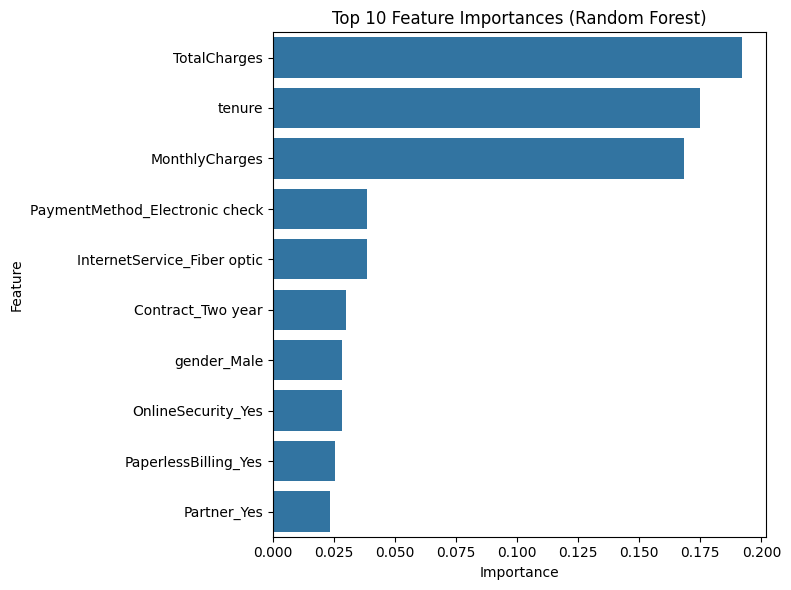

In [ ]:
# Logistic Regression feature importance (scaled)
feature_importance_lr = pd.Series(
    lr_scaled.coef_[0], index=X.columns
).sort_values(key=abs, ascending=False)
print("Top features (Logistic Regression):")
print(feature_importance_lr.head(10))

# Decision Tree feature importance
feature_importance_dt = pd.Series(
    dt.feature_importances_, index=X.columns
).sort_values(ascending=False)
print("\nTop features (Decision Tree):")
print(feature_importance_dt.head(10))

# Random Forest feature importance
feature_importance_rf = pd.Series(
    rf.feature_importances_, index=X.columns
).sort_values(ascending=False)
print("\nTop features (Random Forest):")
print(feature_importance_rf.head(10))

# Plot feature importances for Random Forest
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance_rf.head(10), y=feature_importance_rf.head(10).index)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### 4: Try balancing methods (SMOTE, class_weight="balanced").

In [85]:
from imblearn.over_sampling import SMOTE

# TODO 4: Try balancing methods (SMOTE, class_weight="balanced").
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("After SMOTE, counts of label '1':", sum(y_train_bal == 1))
print("After SMOTE, counts of label '0':", sum(y_train_bal == 0))

# Train logistic regression on balanced data
lr_bal = LogisticRegression(max_iter=1000, random_state=42)
lr_bal.fit(X_train_bal, y_train_bal)
y_pred_bal = lr_bal.predict(X_test)
print("Accuracy with SMOTE balancing:", accuracy_score(y_test, y_pred_bal))

# Try class_weight="balanced" for Decision Tree and Random Forest
dt_bal = DecisionTreeClassifier(random_state=42, class_weight="balanced")
dt_bal.fit(X_train, y_train)
y_pred_dt_bal = dt_bal.predict(X_test)
print("Decision Tree Accuracy (class_weight=balanced):", accuracy_score(y_test, y_pred_dt_bal))

rf_bal = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_bal.fit(X_train, y_train)
y_pred_rf_bal = rf_bal.predict(X_test)
print("Random Forest Accuracy (class_weight=balanced):", accuracy_score(y_test, y_pred_rf_bal))

After SMOTE, counts of label '1': 4139
After SMOTE, counts of label '0': 4139
Accuracy with SMOTE balancing: 0.7381121362668559
Decision Tree Accuracy (class_weight=balanced): 0.7310149041873669
Random Forest Accuracy (class_weight=balanced): 0.7885024840312278
